In [40]:
from brian2 import * 
from matplotlib import pyplot as plt
import json, socket, random
from enum import Enum
from topology import topology
import numpy as np

In [55]:
prefs.codegen.target = "numpy"

In [56]:
#start_scope()
magic_network.schedule = ['start', 'groups', 'synapses', 'thresholds', 'resets', 'end'] 
Numero_de_run = 0  
t_run = 400*ms  
N = len(topology.keys()) 
vrest = -70.0*mV 
tau = 2*ms 
R = 300*Mohm

eqs = '''
    dv/dt = ((vrest - v) + R*I)/tau : volt (unless refractory)
    I : amp
    '''

# Criação dos neurônios comuns (neurons)
neurons = NeuronGroup(N, eqs, threshold='v>-60.0*mV', reset='v=vrest', refractory=3*ms, method='exact') #method='linear')
neurons.v = -80*mV
neurons.I = 0*pA 

In [57]:
#indices = array([0,29,41,53]) #Excita recuar - esperado 81
#indices = array([0,29,41]) #Excita recuar - esperado não disparar nada
#indices = array([0,31]) #Excita perseguir - esperado 78
#indices = array([0,43]) #Excita perseguir - esperado 80
#indices = array([0,52,55]) #Excita perseguir - esperado 79
#indices = array([0,43,55]) #Excita 2 perseguir - esperado 74,79,80
#indices = array([0,33, 34, 38]) #Excita avançar - esperado 78,79,80
#indices = array([0,55,21,33,45,57]) #Excita perseguir - esperado 79 
#indices = array([0,29,41,53,55,21,33,45,57])    
#indices = array([0,43,21,33,45,57,30,42])
l = [100,103,106,109,101,104,107,110,102,105,108,111]
a = random.choice(l)
b = randint(112, 119)
indices = array([0, a, b])
print(a,b)

106 116


In [58]:
inp = SpikeGeneratorGroup(N, indices, array([50]*len(indices))*ms , when='before_synapses')

Stimulus = Synapses(inp, neurons, on_pre='v_post += 11*mV')
for item in range(N):
    Stimulus.connect(i=item, j=item)
    
syn = Synapses(neurons, neurons, 'w : volt', on_pre='v_post += w')

In [59]:
for item in range(N): 
    if ("#" + str(item)) in topology:
        info_json = topology[("#" + str(item))]
        if info_json["syns"]:
            info_json_syns = info_json["syns"]
            n_connections = len(info_json_syns)
            for xpto in range(n_connections):
                liga_json = info_json_syns[xpto][0]
                delay_json = info_json_syns[xpto][1]
                w_json = info_json_syns[xpto][2]
                syn.connect(i=item, j=liga_json) 
                syn.w[item, liga_json] = w_json*mV
                syn.delay[item, liga_json] = delay_json*ms
state_mon = StateMonitor(neurons, 'v', record = True)
spike_mon_neurons = SpikeMonitor(neurons)
spike_mon_input = SpikeMonitor(inp)

net = Network(neurons, inp, Stimulus, syn)
net.add(state_mon)
net.add(spike_mon_neurons)  
net.add(spike_mon_input)
net.run(t_run)

(30.0, 400.0)

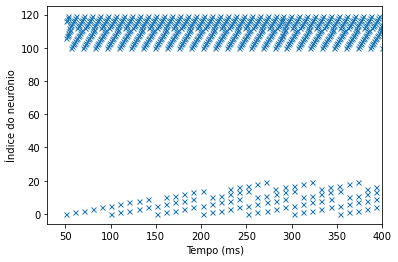

In [60]:
plt.plot(spike_mon_neurons.t/ms, spike_mon_neurons.i, 'x', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')
plt.savefig('random.png')
xlim(30, 400)

In [8]:
np.array(set(spike_mon_neurons.i))

array({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 43, 73, 80},
      dtype=object)

In [9]:
#21,33,45,57
list(spike_mon_neurons.t/ms)[87]

90.50000000000001

In [14]:
list(spike_mon_neurons.t/ms)[7]

100.2

In [9]:
[i for i, x in enumerate(list(spike_mon_neurons.i)) if x == 71]

[107]

In [1]:
print(
    list(spike_mon_neurons.t/ms)[list(spike_mon_neurons.i).index(0)],
    list(spike_mon_neurons.t/ms)[list(spike_mon_neurons.i).index(4)],
    #list(spike_mon_neurons.t/ms)[90],
    #list(spike_mon_neurons.t/ms)[91],
    list(spike_mon_neurons.t/ms)[list(spike_mon_neurons.i).index(9)],
    #list(spike_mon_neurons.t/ms)[206],
    list(spike_mon_neurons.t/ms)[list(spike_mon_neurons.i).index(14)],
    list(spike_mon_neurons.t/ms)[list(spike_mon_neurons.i).index(19)],
)

NameError: name 'spike_mon_neurons' is not defined

In [ ]:
list(spike_mon_neurons.t/ms)[list(spike_mon_neurons.i).index(79)]

In [ ]:
list(spike_mon_neurons.t/ms)[list(spike_mon_neurons.i).index(72)]

In [ ]:
list(spike_mon_neurons.t/ms)[-1]